In [ ]:
import os
import sys
import glob as glob 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv2

In [ ]:
os.getcwd()

'/content'

In [ ]:
folder_path = 'drive/My Drive/Xray_set'

In [ ]:
#Label Mapping
mapping = pd.read_csv(f'{folder_path}/Chest_xray_Corona_Metadata.csv')
mapping = mapping.iloc[:, 1:]
print(mapping)

                X_ray_image_name  ... Label_1_Virus_category
0              IM-0128-0001.jpeg  ...                    NaN
1              IM-0127-0001.jpeg  ...                    NaN
2              IM-0125-0001.jpeg  ...                    NaN
3              IM-0122-0001.jpeg  ...                    NaN
4              IM-0119-0001.jpeg  ...                    NaN
...                          ...  ...                    ...
5905  person1637_virus_2834.jpeg  ...                  Virus
5906  person1635_virus_2831.jpeg  ...                  Virus
5907  person1634_virus_2830.jpeg  ...                  Virus
5908  person1633_virus_2829.jpeg  ...                  Virus
5909  person1632_virus_2827.jpeg  ...                  Virus

[5910 rows x 5 columns]


In [ ]:
#Labels
label = pd.read_csv(f'{folder_path}/Chest_xray_Corona_dataset_Summary.csv')
label = label.iloc[:, 1:]
print(label)

      Label Label_1_Virus_category Label_2_Virus_category  Image_Count
0    Normal                    NaN                    NaN         1576
1  Pnemonia         Stress-Smoking                   ARDS            2
2  Pnemonia                  Virus                    NaN         1493
3  Pnemonia                  Virus               COVID-19           58
4  Pnemonia                  Virus                   SARS            4
5  Pnemonia               bacteria                    NaN         2772
6  Pnemonia               bacteria          Streptococcus            5


##TRIAL 1: Normal vs Pneumonia

In [ ]:
labels, distribution = np.unique(mapping.iloc[:, 1].tolist(), return_counts = True)
print(labels)
print(distribution)

['Normal' 'Pnemonia']
[1576 4334]


In [ ]:
num_class = len(labels)
num_class

2

In [ ]:
#Training set
train_list = glob.glob(f'{folder_path}/Coronahack-Chest-XRay-Dataset/*/train/*')
len(train_list)

5309

In [ ]:
#Testing set
test_list = glob.glob(f'{folder_path}/Coronahack-Chest-XRay-Dataset/*/test/*')
len(test_list)

624

In [ ]:
#Creating a label numpy set, training and validating set
trainlabel = np.empty([len(train_list), 1])
testlabel = np.empty([len(test_list), 1])
#NORMAL = 0
#PNEUMONIA = 1
train_indices = [x.split('/')[-1] for x in train_list]
test_indices = [x.split('/')[-1] for x in test_list]
f = lambda x: 0 if x == 'Normal' else 1
for i in range(len(mapping)):
  if(mapping.iloc[i,0] in train_indices):
    trainlabel[train_indices.index(mapping.iloc[i,0]), 0] = int(round(f(mapping.iloc[i, 1])))
  elif (mapping.iloc[i,0] in test_indices):
    testlabel[test_indices.index(mapping.iloc[i,0]), 0] = int(round(f(mapping.iloc[i, 1])))
  else:
    print(f'There is no file {(mapping.iloc[i,0] in train_indices)}')
print(f'Trainlabel: {trainlabel.shape}')
print(f'Testlabel: {testlabel.shape}')

Trainlabel: (5309, 1)
Testlabel: (624, 1)


[0. 1.]
[1342 3967]
[234 390]


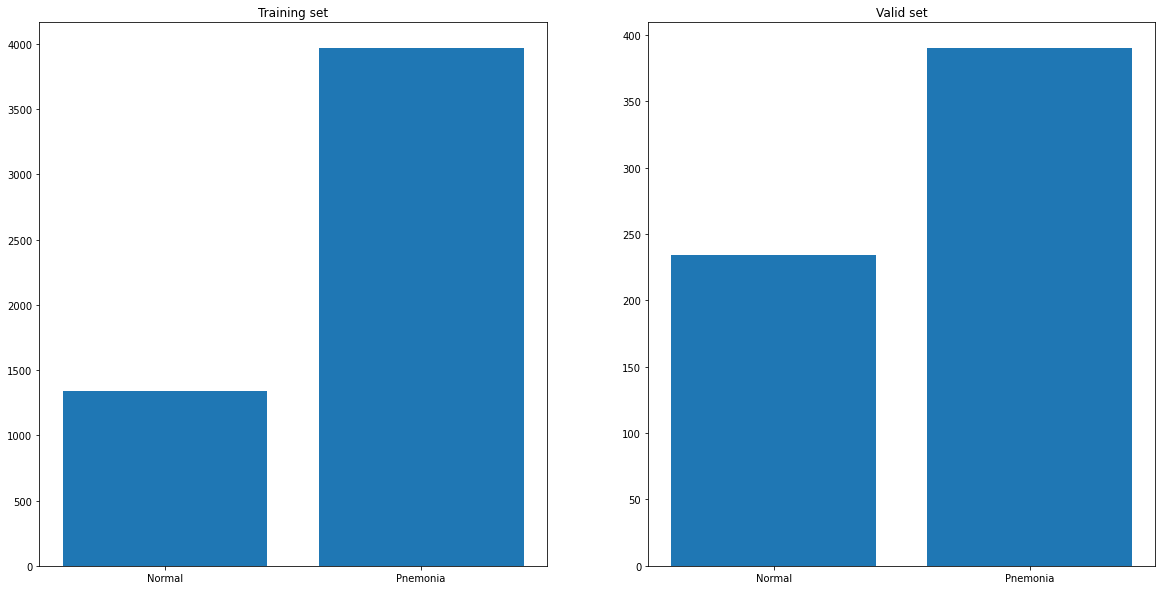

In [ ]:
#Drawing distribution
__, train_count = np.unique(trainlabel, return_counts = True)
_, test_count = np.unique(testlabel, return_counts = True)
print(__)
print(train_count)
print(test_count)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20,10))

ax1.set_title('Training set')
ax1.bar(_, train_count)
ax1.set_xticks(_)
ax1.set_xticklabels(labels)

ax2.set_title('Valid set')
ax2.bar(_, test_count)
ax2.set_xticks(_)
ax2.set_xticklabels(labels)

plt.show()

In [ ]:
import cv2


In [ ]:
#Building data set
traindata = []
for imagePath in train_list:
	# load the image, swap color channels, and resize it to be a fixed
	# 128x128 pixels while ignoring aspect ratio
	image = cv2.imread(imagePath)
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	image = cv2.resize(image, (128, 128))
	traindata.append(image)

In [ ]:
os.chdir('drive/My Drive/lib')
from showSample import showSample
os.chdir('../../..')

drive/My Drive/Xray_set/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train/person798_virus_1430.jpeg
Shape: (902, 1294)


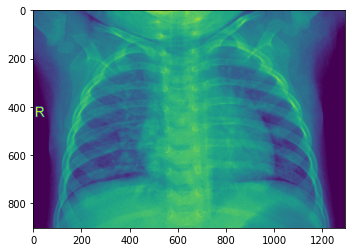

In [ ]:
#Displaying sample
index = 50
print(train_list[index])
showSample(train_list[index])

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Model
from keras.layers import Input, Activation, BatchNormalization, Conv2D, MaxPooling2D, Dense, Flatten
from keras.losses import CategoricalCrossentropy 
from keras.callbacks import EarlyStopping, ModelCheckpoint

model = ConvNet(config = config)
model.createmodel()
model.summary()

In [ ]:
visible = Input(shape=(30,30,1))
conv1 = Conv2D(32, kernel_size=4, activation='relu')(visible)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
conv2 = Conv2D(16, kernel_size=4, activation='relu')(pool1)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
flat = Flatten()(pool2)
hidden1 = Dense(1000, activation='relu')(flat)
output = Dense(num_class, activation='softmax')(hidden1)
model = Model(inputs=visible, outputs=output)

In [ ]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 30, 30, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 27, 27, 32)        544       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        8208      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 1000)             

In [ ]:
import datetime

now_str = datetime.datetime.now()
dt_string = now_str.strftime("%d%m%y_%H%M%S")
print(dt_string)

040920_014848


In [ ]:
os.getcwd()

'/content'

In [ ]:
callback = EarlyStopping(monitor='loss', patience=3)

checkpoint = ModelCheckpoint(f"drive/My Drive/Xray_set/weights/{dt_string}/"+"{epoch:02d}-{val_acc:.4f}.h5", 
                             monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [callback, checkpoint]

epochs = 100
batch_size = 16

model.compile(loss=losses.CategoricalCrossentropy(),
              optimizer=optimizers.Adam(lr=0.001),
              metrics=[CategoricalCrossentropy])
history = model.fit(x_train_reshaped, y_train_binary,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          callbacks=callbacks_list,
          validation_data=(x_test_reshaped, y_test_binary))

NameError: ignored

In [ ]:
temp = [str(label.iloc[i,0]) + '_' + str(label.iloc[i,1]) for i in range(1,len(label))]
temp = ['Normal'] + temp
temp = list(set(temp))
temp.sort()
label_1 = pd.DataFrame()
label_1['Label'] = temp
temp = [1576,2, 1493+58+4, 2772+5]
label_1['Image_Count'] = temp
print(label_1)